In [43]:
workflow = {
    1 : 'data (prepare and load)',
    2 : "build Model",
    3 : 'fitting the model to data (training)',
    4 : "making predictions and evaluating a model (inference)",
    5 : "saving and loading a model",
    6 : "putting it all together"
}

In [44]:
from pprint import pprint
pprint(workflow)

{1: 'data (prepare and load)',
 2: 'build Model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}


In [45]:
import torch
from torch import nn # nn contains all the building blocks for creating neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
print(torch.__version__)

2.5.1+cpu


### 1. Data (preparing and loading)

- Excel Spreadsheet
- Image of any kind
- Videos
- Audio
- DNA
- Text

1. First Represent the data
2. Build a model to learn patterns in that numerical representation.

#### Let's Create Linear Regression
with Known parameters

In [46]:
# Create Known Parameters
weight = 0.7
bias = 0.3

# Create Data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Splitting data into training and test sets

In [47]:
len(X), len(y)

(50, 50)

In [48]:
# spliting 80% of the data for training and 20% for testing
train_split = int((0.8) * len(X))
train_split

40

In [49]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    sns.scatterplot(x=train_data.squeeze(), y=train_labels.squeeze(), color="blue", label="Training data")

    # Plot test data in green
    sns.scatterplot(x=test_data.squeeze(), y=test_labels.squeeze(), color="green", label="Testing data")

    # Add predictions (if there are any)
    if predictions is not None:
        sns.scatterplot(x=test_data.squeeze(),
                        y=predictions.squeeze(),
                        color="red",
                        label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 12})
    
    plt.show()

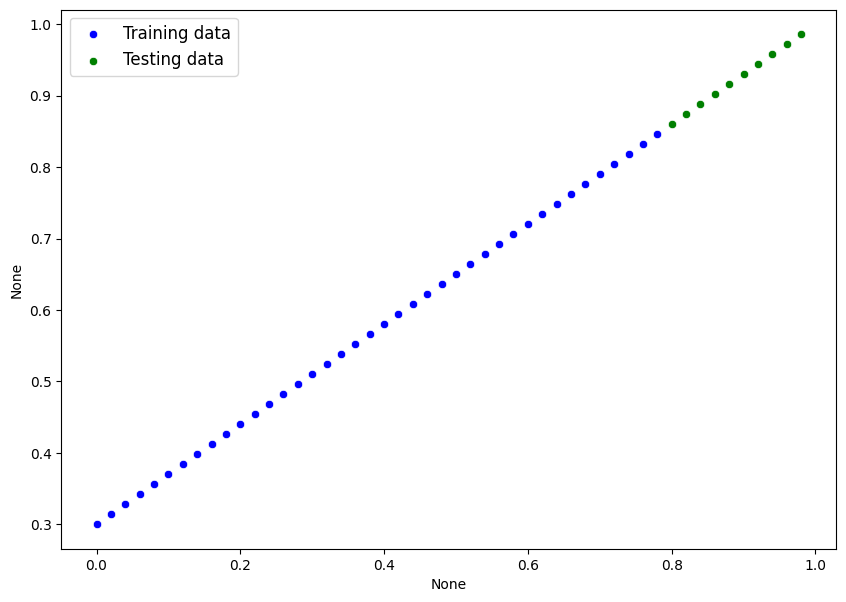

In [52]:
plot_predictions()

#### Build Model

In [53]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                   requires_grad=True,
                                   dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        
    def forward(self, X):
        return X * self.weight + self.bias

### Model Building Essentials

* torch.nn.Module: A PyTorch class that contains all the layers of the model.
* nn.Parameter: A tensor that automatically registers itself as a parameter of a Module when assigned as an attribute.
* torch.nn: A subpackage that contains all the building blocks for creating neural networks.
* torch.optim: A subpackage that contains various optimization algorithms.
* torch.nn.functional: A functional API that contains all the operations that can be applied to a neural network.
* torch.utils.data: A subpackage that contains tools for data processing.
* torch.utils.data.Dataset: An abstract class representing a dataset.
* torch.utils.data.DataLoader: Wraps a dataset and provides access to the underlying data.
* torch.distributed: A package that contains the tools for distributed training.
* torchmetrics: A package that contains various metrics for evaluating machine learning models.

In [54]:
torch.rand(1)

tensor([0.9408])

In [55]:
# Create a random seed
torch.random.manual_seed(42)

# Instantiate the model
model = LinearRegressionModel()

list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [56]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [57]:
with torch.inference_mode():
    y_pred = model(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

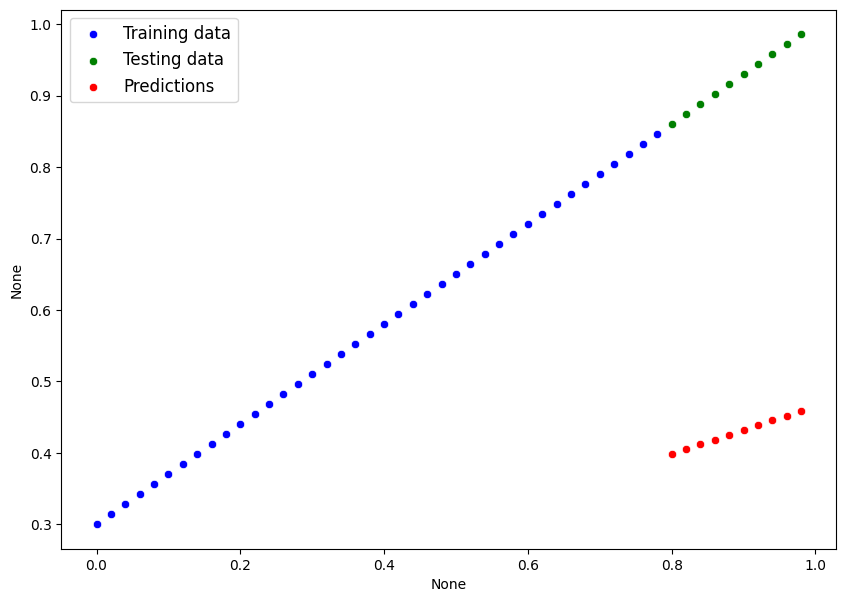

In [58]:
plot_predictions(predictions=y_pred)

#### Train model

In [59]:
# check out our model's parameters
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [60]:
# setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optim = torch.optim.SGD(model.parameters(),
                        lr=0.01)

#### Building a training loop (and a testing loop) in PyTorch

Things to learn about training loop:
0. Loop through the data.
1. Forward pass: Make a prediction.
2. Calculate the Loss (compare forward pass prediction to actual target).
3. Optimizer zero grad
4. Loss Backward - Calculate gradients of the loss with respect to model parameters.
5. Optimizer step - Update the model parameters based on their gradients.


In [61]:
### An epoch is one loop through the data....
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

#### Training 
# 0. Loop through thee data
for epoch in range(epochs):
    # Set the model to training mode
    model.train() # train model in PyTorch set all parameters that require grad to True

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero all the gradients
    optim.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the model parameters
    loss.backward()

    # 5. Take a step with the optimizer
    optim.step()
    # By default PyTorch changes the values of the model parameters in-place, so we don't have to update the model parameters ourselves
    # also thee gradients are accumulated in the model parameters so we have to zero them out after each epoch

    

    # Testing the model
    model.eval() # eval model in PyTorch set all parameters that require grad to False
    with torch.inference_mode(): # turns off gradient tracking and autograd engine also turns off dropout and batch normalization layers 
        # Forward Pass
        y_pred = model(X_test)

        # Calculate loss
        test_loss = loss_fn(y_pred, y_test)

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch [{epoch}/{epochs}]. Loss: {loss.item():.4f}. Test Loss: {test_loss.item():.4f}")


Epoch [0/200]. Loss: 0.3129. Test Loss: 0.4811
Epoch [10/200]. Loss: 0.1977. Test Loss: 0.3464
Epoch [20/200]. Loss: 0.0891. Test Loss: 0.2173
Epoch [30/200]. Loss: 0.0531. Test Loss: 0.1446
Epoch [40/200]. Loss: 0.0454. Test Loss: 0.1136
Epoch [50/200]. Loss: 0.0417. Test Loss: 0.0992
Epoch [60/200]. Loss: 0.0382. Test Loss: 0.0889
Epoch [70/200]. Loss: 0.0348. Test Loss: 0.0806
Epoch [80/200]. Loss: 0.0313. Test Loss: 0.0723
Epoch [90/200]. Loss: 0.0279. Test Loss: 0.0647
Epoch [100/200]. Loss: 0.0245. Test Loss: 0.0565
Epoch [110/200]. Loss: 0.0210. Test Loss: 0.0482
Epoch [120/200]. Loss: 0.0176. Test Loss: 0.0406
Epoch [130/200]. Loss: 0.0142. Test Loss: 0.0323
Epoch [140/200]. Loss: 0.0107. Test Loss: 0.0241
Epoch [150/200]. Loss: 0.0073. Test Loss: 0.0165
Epoch [160/200]. Loss: 0.0039. Test Loss: 0.0082
Epoch [170/200]. Loss: 0.0089. Test Loss: 0.0050
Epoch [180/200]. Loss: 0.0089. Test Loss: 0.0050
Epoch [190/200]. Loss: 0.0089. Test Loss: 0.0050


In [62]:
# Epoch [90/100]. Loss: 0.0089. Test Loss: 0.0050

In [63]:
model.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

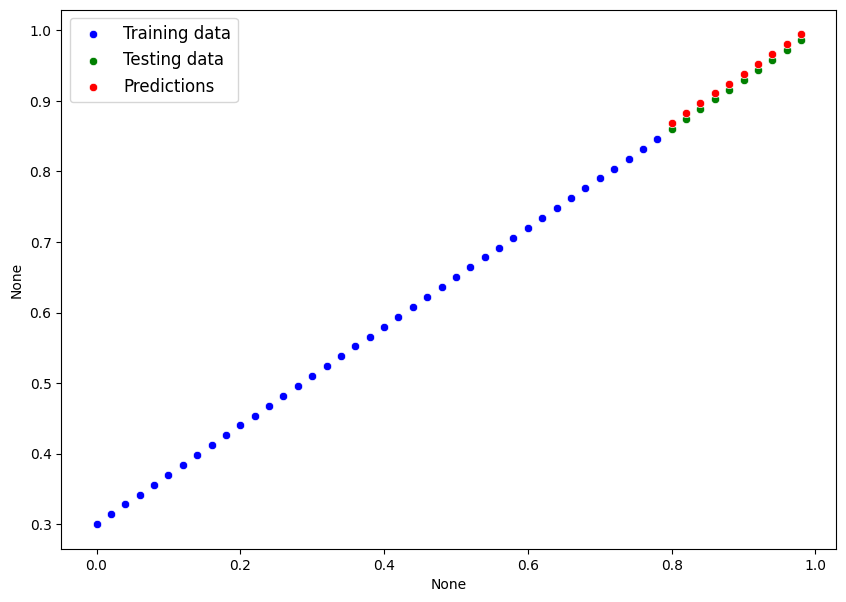

In [64]:
with torch.inference_mode():
    y_pred = model(X_test)

plot_predictions(predictions=y_pred)

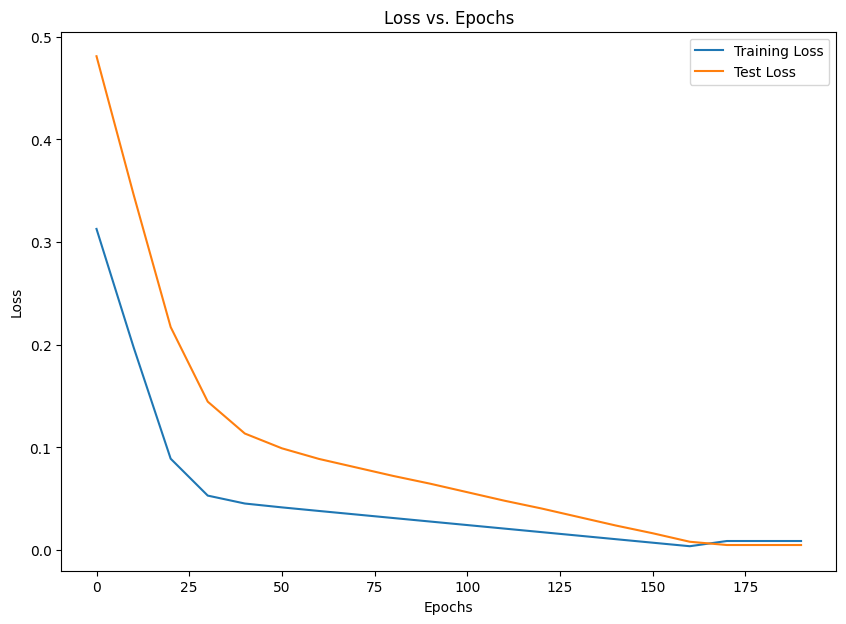

In [65]:
# plot the loss curve
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, torch.tensor(loss_values).detach().numpy(), label="Training Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Loss vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Saving a model in PyTorch

There are three main methods you should know about saving and loading models in PyTorch.

1. `torch.save()` : This saves a model's state dictionary, which contains all the parameters of the model.
2. `torch.load()` : This loads a model's state dictionary.
3. `torch.nn.Module.load_state_dict()` : This loads a model's state dictionary into a model.

In [66]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('model/01_pytorch_workflow_model_0.pth')

In [67]:
torch.save(model.state_dict(), MODEL_SAVE_PATH)

### Loading our PyTorch model

Since wee saved our model state_dict to a file, we can load it back in using torch.load and then load it into a new model instance using model.load_state_dict. 
This is useful if you've trained a model and want to use it to make predictions on new data.    

In [68]:
# To load in a saved state_dict we have to create a new model with the same parameters as the original model

loaded_model_0 = LinearRegressionModel()

# Loade the saved state_dict into the model

In [69]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [70]:
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [71]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Makee some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [73]:
loaded_model_preds == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])